In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
import pandas as pd
from import_data import get_demand, get_gen, get_mcp, get_vre
from environment import market_env
from actor_critic import ActorCriticAgent
from utils import plot_learning_curve
import numpy as np

In [114]:
start = pd.Timestamp(year=2023, month=1, day=1, tz="europe/brussels")
end = pd.Timestamp.now(tz="europe/brussels").floor('D') + pd.Timedelta(days=2)

In [116]:
df_demand, df_demand_scaled = get_demand(start, end)
df_vre, df_vre_scaled = get_vre(start, end)
df_gen, df_gen_scaled = get_gen(start, end)
df_mcp = get_mcp(start, end)

In [128]:
# Example usage
env = market_env(demand=df_demand_scaled, re = df_vre_scaled, prices = df_mcp, eps_length=24, capacity=200, mc=35)

# Assuming you have a gym environment called 'env'
input_size = env.observation_space.shape[0]
n_actions = env.action_space.n
n_games = 1000

agent = ActorCriticAgent(input_size, n_actions)

filename = 'power_plant.png'

figure_file = 'plots/' + filename

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

/Users/louis.skowronek/miniforge3/envs/bda_env/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [129]:
reward_history = []

if load_checkpoint:
    agent.load_models()

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0

    while not done:

        action = agent.choose_action(observation)

        observation_next, reward, done, _ = env.step(action)
        score += reward
        if not load_checkpoint:
            agent.update(observation, reward, observation_next, done)
        observation = observation_next

    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

... saving models ...
episode  0 score 198.3 avg_score 198.3
episode  1 score 185.8 avg_score 192.0
episode  2 score 87.0 avg_score 157.0
episode  3 score 89.7 avg_score 140.2
episode  4 score 159.7 avg_score 144.1
episode  5 score 115.8 avg_score 139.4
episode  6 score 131.3 avg_score 138.2
episode  7 score 86.0 avg_score 131.7
episode  8 score 189.6 avg_score 138.1
episode  9 score 95.9 avg_score 133.9
episode  10 score 109.7 avg_score 131.7
episode  11 score 176.4 avg_score 135.4
episode  12 score 39.0 avg_score 128.0
episode  13 score 169.6 avg_score 131.0
episode  14 score 166.3 avg_score 133.3
episode  15 score 97.5 avg_score 131.1
episode  16 score 88.4 avg_score 128.6
episode  17 score 106.4 avg_score 127.4
episode  18 score 178.8 avg_score 130.1
episode  19 score 92.8 avg_score 128.2
episode  20 score 84.7 avg_score 126.1
episode  21 score 78.8 avg_score 124.0
episode  22 score 75.9 avg_score 121.9
episode  23 score 71.0 avg_score 119.8
episode  24 score 191.2 avg_score 122.6


In [130]:
env.results_ep.describe()

,reward,market price,bid price,bid volume
count,3216.000000,3216.000000,3216.000000,3216.0
mean,8.854197,110.486720,28.028296,200.0
std,2.762287,44.607165,1.604661,0.0
min,-7.224000,-8.820000,28.000000,200.0
25%,9.302400,89.870000,28.000000,200.0
50%,9.623300,110.565000,28.000000,200.0
75%,9.926650,137.345000,28.000000,200.0
max,10.758800,270.220000,119.000000,200.0


<Axes: >

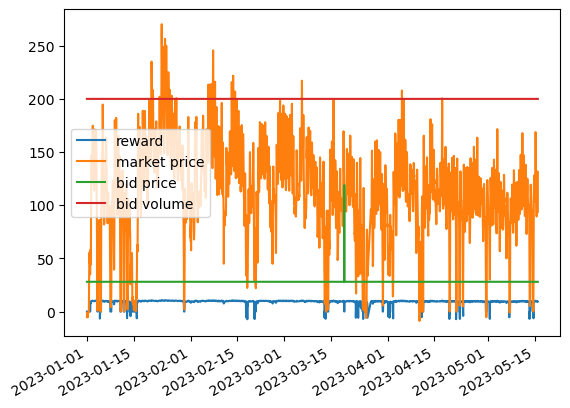

In [132]:
env.results_ep.plot()

In [137]:
x = [i + 1 for i in range(len(score_history))]
plot_learning_curve(x, score_history)

NameError: name 'plot_learning_curve' is not defined